In [19]:
import torch

In [20]:
x = torch.tensor(3.0, requires_grad=True)

### Simple Linear Function

In [21]:
target = x ** 2

In [22]:
x, target

(tensor(3., requires_grad=True), tensor(9., grad_fn=<PowBackward0>))

In [23]:
target.backward()

In [24]:
x.grad

tensor(6.)

#### Nested function

In [25]:
x = torch.tensor(3.0, requires_grad=True)
target = x ** 2
z = torch.sin(target)

In [26]:
x, target, z

(tensor(3., requires_grad=True),
 tensor(9., grad_fn=<PowBackward0>),
 tensor(0.4121, grad_fn=<SinBackward0>))

In [27]:
# gives dz/dx = dz/dy * dy/dx
z.backward()

In [28]:
x.grad

tensor(-5.4668)

### Autograd for a complete NN

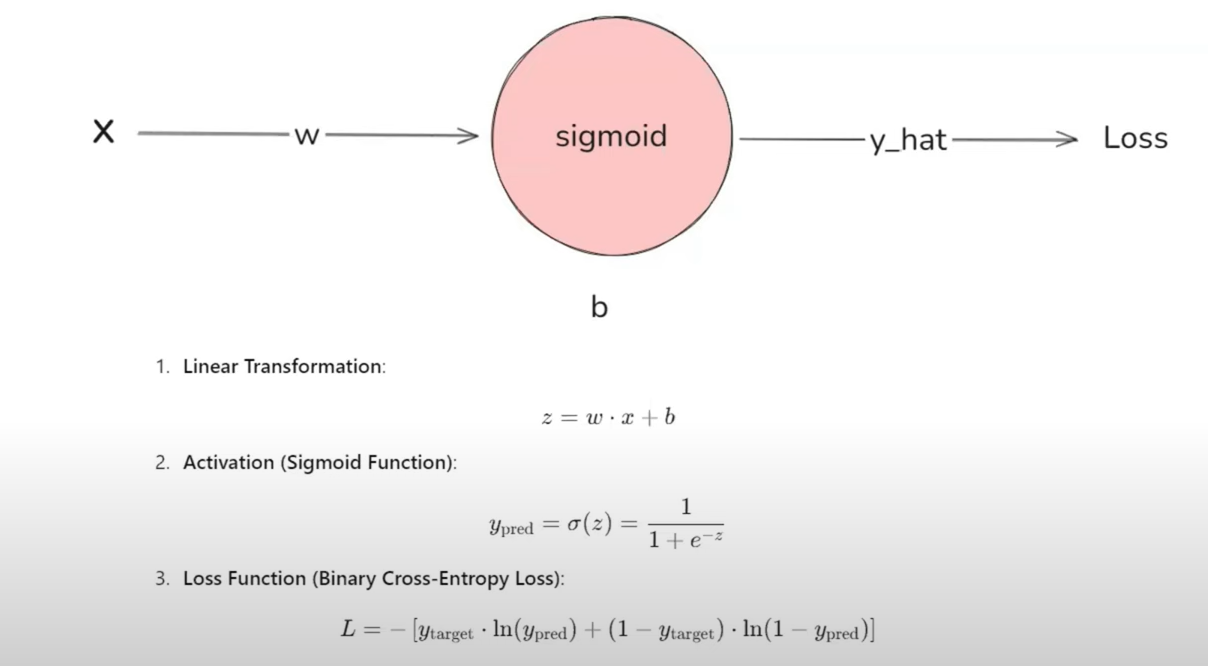](attachment:image.png)

In [29]:
# data query
x = torch.tensor(6.0) # cgpa
target = torch.tensor(0.0) # predicted 0/1

In [30]:
# we need dL/dw & dL/db
# w -> weights initialized with 1.0
w = torch.tensor(1.0, requires_grad=True)  # weight
# b -> bias initialized with 0.0
b = torch.tensor(0.0, requires_grad=True)  # bias

In [31]:
# forward pass
z = w*x + b  # linear transformation
z

tensor(6., grad_fn=<AddBackward0>)

In [32]:
# activation function [sigmoid]
y_pred = torch.sigmoid(z)  # activation function
y_pred

tensor(0.9975, grad_fn=<SigmoidBackward0>)

In [33]:
# loss function [binary cross entropy]
def bce_loss(y_pred, target):
    epsilon = 1e-7  # to avoid log(0)
    # clamp to avoid log(0)
    predction = torch.clamp(y_pred, epsilon, 1 - epsilon)
    return -(target * torch.log(predction) + (1 - target) * torch.log(1 - predction))

In [34]:
loss = bce_loss(y_pred, target)  # loss function
loss

tensor(6.0025, grad_fn=<NegBackward0>)

In [35]:
# backward pass
loss.backward()

In [36]:
w.grad, b.grad

(tensor(5.9852), tensor(0.9975))

#### Clearing Grads

In [41]:
x= torch.tensor(6.0, requires_grad=True) 
x

tensor(6., requires_grad=True)

In [51]:
y= x**2
y

tensor(36., grad_fn=<PowBackward0>)

In [52]:
y.backward()

In [ ]:
x.grad

# if you re-run forward pass, it will accumulate gradients

tensor(36.)

In [55]:
x.grad.zero_()  # zero out gradients


tensor(0.)